In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os, sys
sys.path.append('../scripts')

In [3]:
from eda import *

In [4]:
# Load datasets
fraud_df = pd.read_csv('../Data/fraud_data.csv')  
ip_df = pd.read_csv('../Data/IpAddress_to_Country.csv') 
credit_df = pd.read_csv('../Data/creditcard.csv') 

**Descriptive Analysis**

In [5]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [6]:
ip_df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [7]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
fraud_df.shape

(151112, 11)

In [9]:
ip_df.shape

(138846, 3)

In [10]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [11]:
fraud_df.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

- No null values in the fraud dataset

In [12]:
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
ip_df.isnull().sum()

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

In [14]:
fraud_df.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [15]:
fraud_df.duplicated().sum()

np.int64(0)

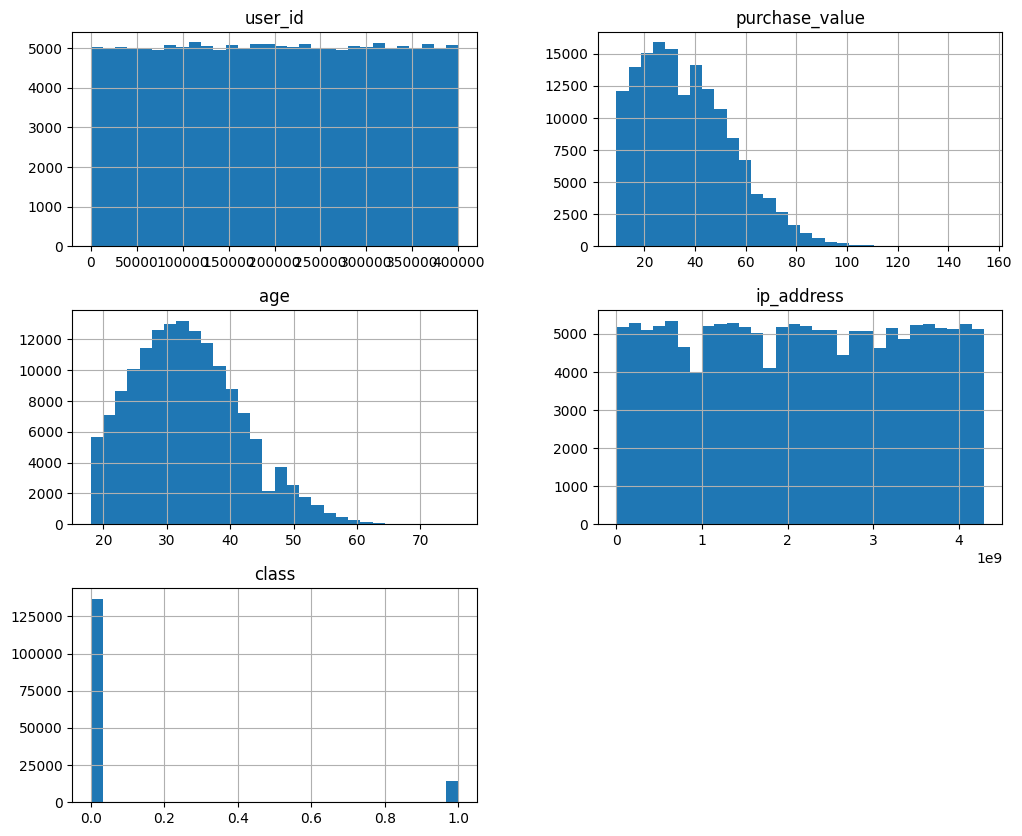

In [16]:
fraud_df.hist(figsize=(12, 10), bins=30)
plt.show()

helps understand the distribution of numerical variables

**Categorical Data Analysis**

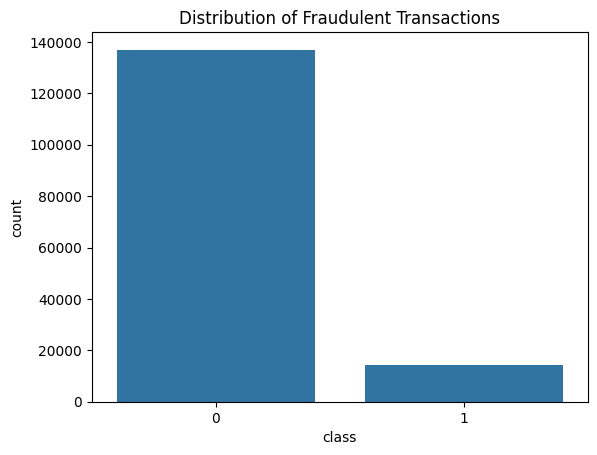

In [17]:
# Count of fraud transactions
sns.countplot(x='class', data=fraud_df)
plt.title("Distribution of Fraudulent Transactions")
plt.show()

helps understand the distribution of fraud vs non-fraud transactions

**Exploratory Data Analysis**

1. Handle Missing values

- Since there are no missing values in all of the datasets, we will jump this step.

2. Data Cleaning

- Remove duplicates
- Correct data types


In [18]:
# Removing duplicates
fraud_df = remove_duplicates(fraud_df)

In [19]:
fraud_df = correct_data_types(fraud_df)
fraud_df['ip_address'] = fraud_df['ip_address'].astype(int)

In [20]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  int64         
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 12.7+ MB


3. Exploratory Data Analysis (EDA)
- Univariate analysis


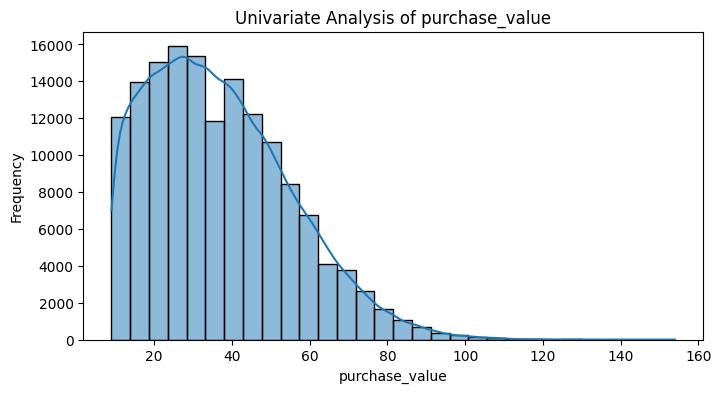

In [21]:
univariate_analysis(fraud_df, 'purchase_value')

-  Most transactions are lower in value, with a right-skewed distribution.

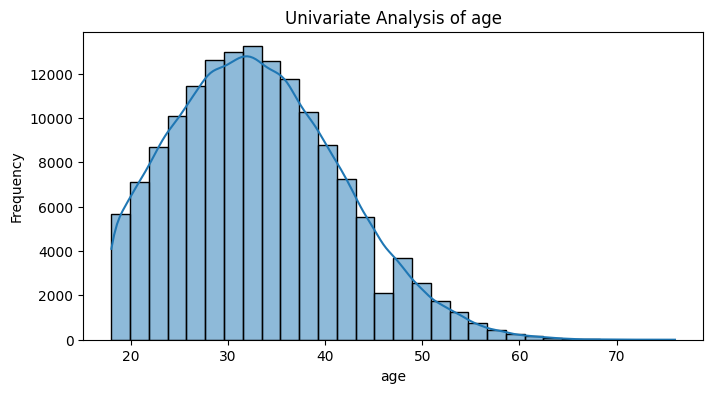

In [22]:
univariate_analysis(fraud_df, 'age')

- Age distribution is highest in the 20-40 range, tapering off in older groups.

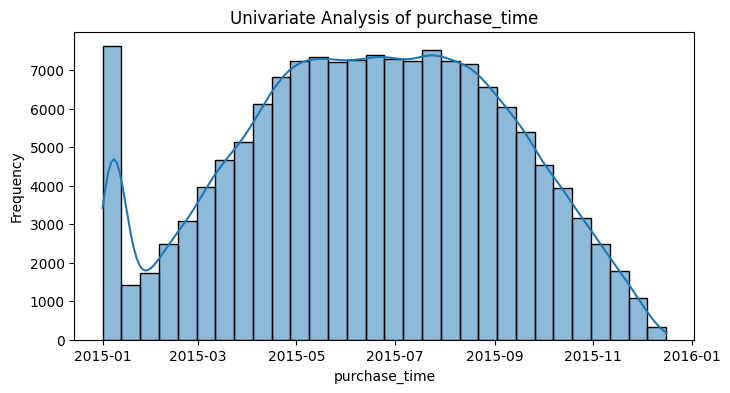

In [23]:
univariate_analysis(fraud_df, 'purchase_time')

- Peaks in mid-2015, suggesting seasonal trends in purchasing.

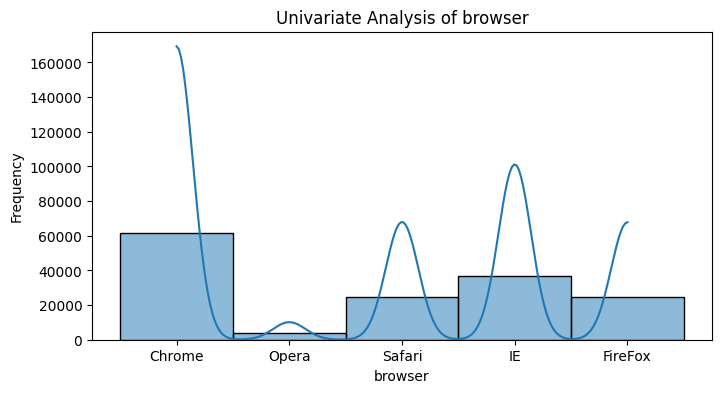

In [24]:
univariate_analysis(fraud_df, 'browser')

- Chrome leads in usage, with Opera and Safari also notable.

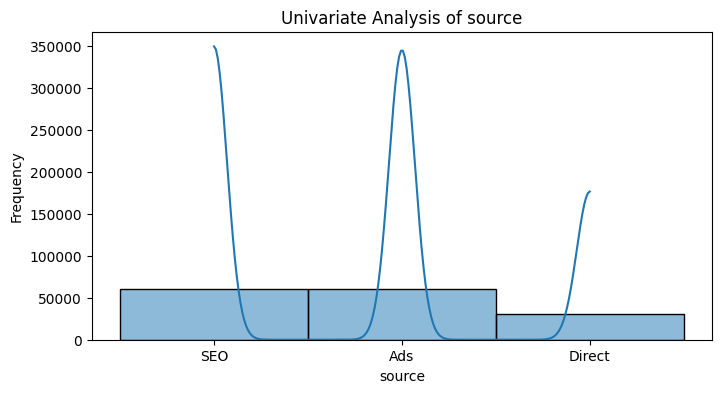

In [25]:
univariate_analysis(fraud_df, 'source')

- Most acquisitions come from Ads, followed by SEO and Direct.

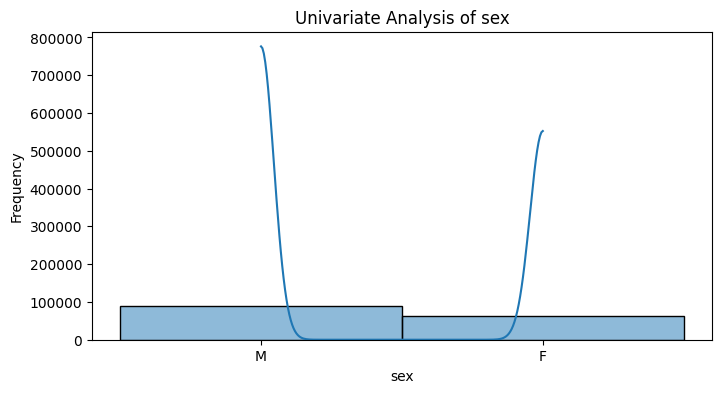

In [26]:
univariate_analysis(fraud_df, 'sex')

- Predominantly male (M) representation, with fewer females (F).

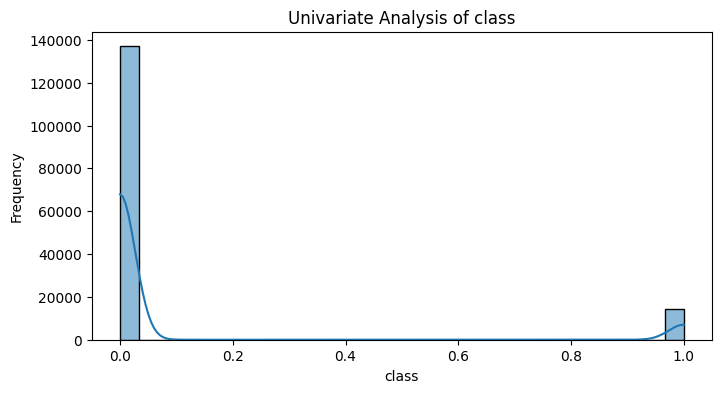

In [27]:
univariate_analysis(fraud_df, 'class')

-  Skewed distribution with a majority classified as 0, indicating an imbalance.

- Bivariate Analysis

c:\Users\USER\Desktop\KAIM\Adey-Innovations-Fraud-Detection\notebook\../scripts\eda.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[x_col], y=df[col2], palette='Set2', fliersize=0)


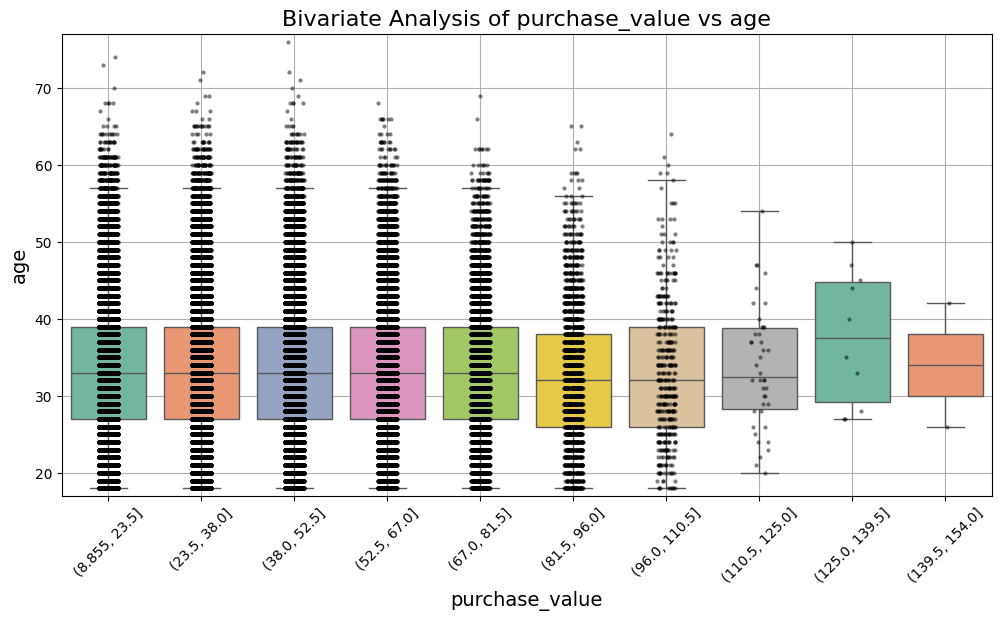

In [28]:
bivariate_analysis(fraud_df, 'purchase_value', 'age')

- higher purchase values are associated with older age groups. Younger individuals tend to spend less, while those above 110.5 in purchase value show a higher median age.

c:\Users\USER\Desktop\KAIM\Adey-Innovations-Fraud-Detection\notebook\../scripts\eda.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[x_col], y=df[col2], palette='Set2', fliersize=0)


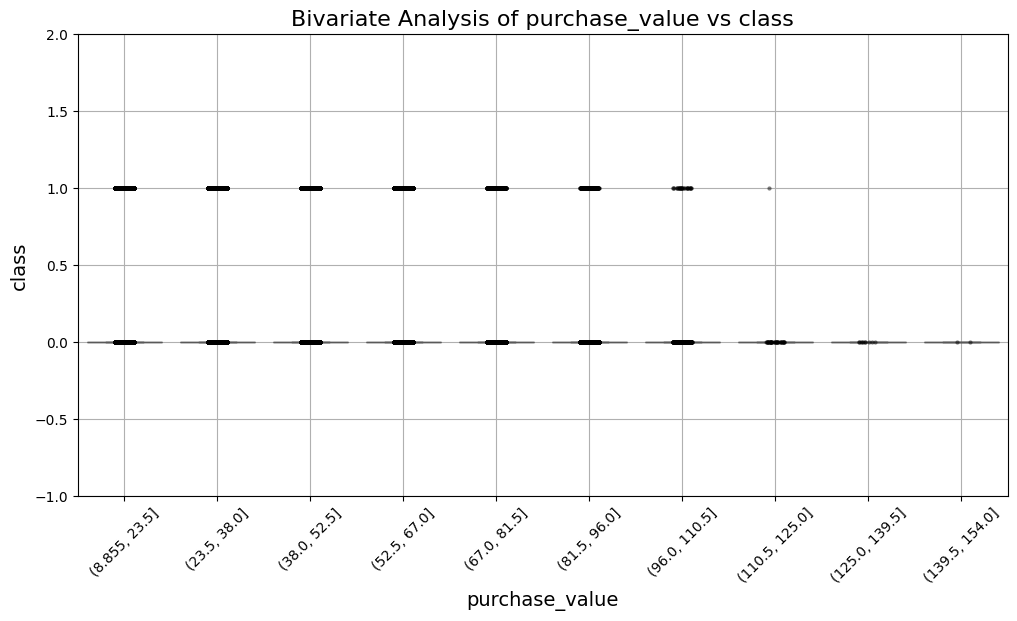

In [29]:
bivariate_analysis(fraud_df, 'purchase_value', 'class')

- lower purchase values are mainly associated with class 0, while higher purchase values (above 110.5) are linked to class 1. This indicates that purchase value is a significant predictor of class affiliation, with higher spending correlating to a greater likelihood of being classified as 1.

c:\Users\USER\Desktop\KAIM\Adey-Innovations-Fraud-Detection\notebook\../scripts\eda.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[x_col], y=df[col2], palette='Set2', fliersize=0)


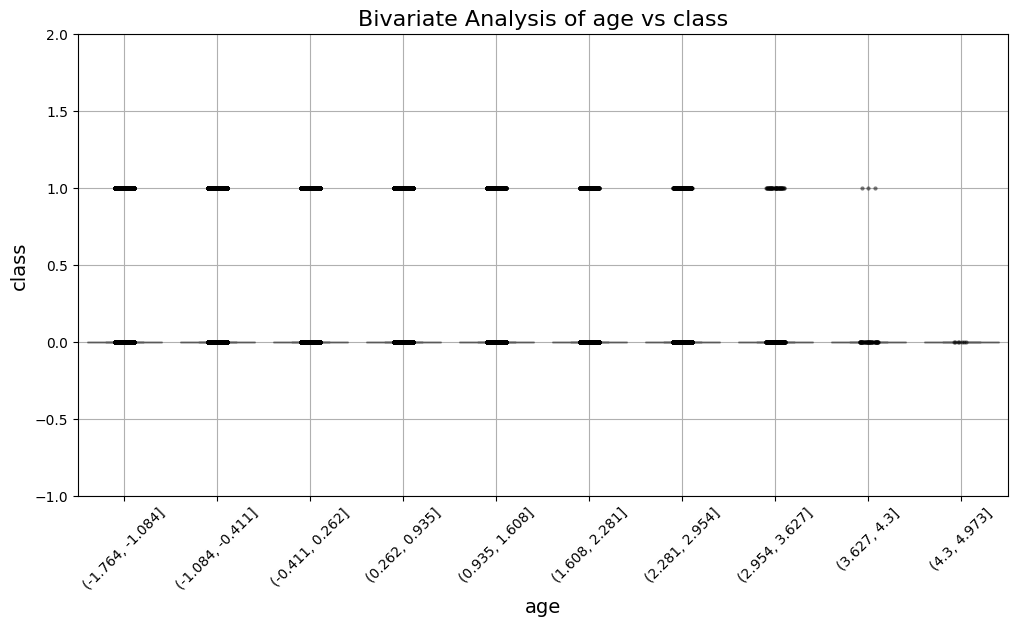

In [48]:
bivariate_analysis(fraud_df, 'age', 'class')

- The boxplot shows that older age groups (64.4 to 76.1) are mostly classified as 1, indicating a strong correlation between age and class membership. Younger individuals exhibit a wider range of class values, with many classified as 0.

c:\Users\USER\Desktop\KAIM\Adey-Innovations-Fraud-Detection\notebook\../scripts\eda.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[x_col], y=df[col2], palette='Set2', fliersize=0)


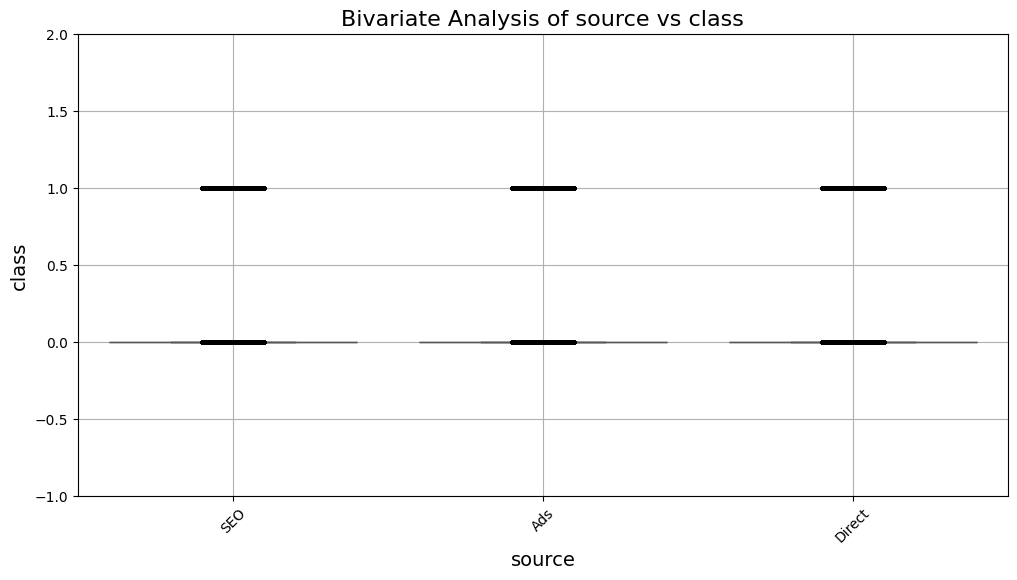

In [31]:
bivariate_analysis(fraud_df, 'source', 'class')

- little variation in class membership across different sources (SEO, Ads, Direct). This suggests that the source of acquisition does not significantly influence class affiliation.

c:\Users\USER\Desktop\KAIM\Adey-Innovations-Fraud-Detection\notebook\../scripts\eda.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[x_col], y=df[col2], palette='Set2', fliersize=0)


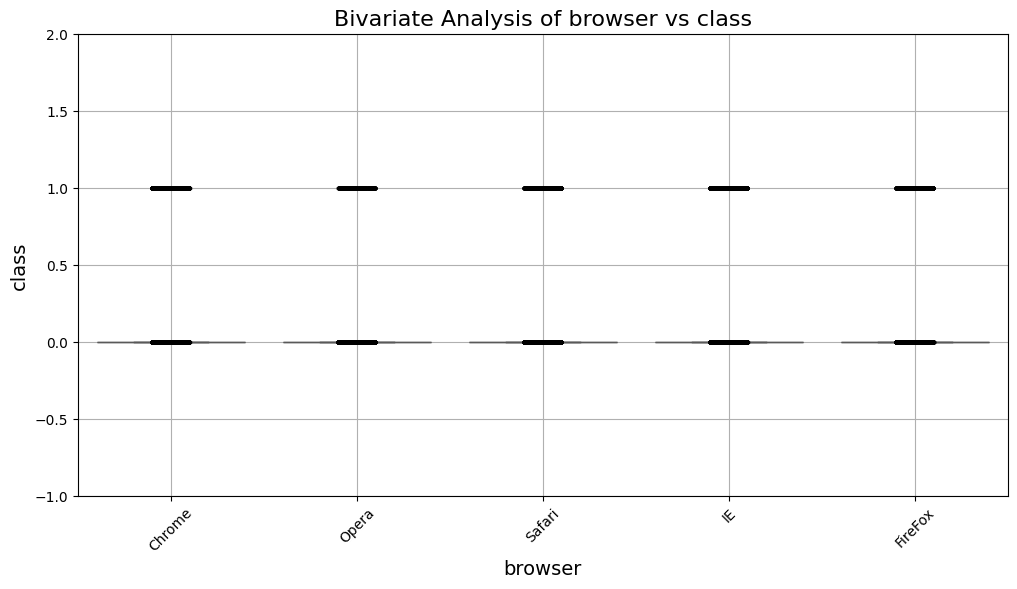

In [32]:
bivariate_analysis(fraud_df, 'browser', 'class')

- All browsers (Chrome, Opera, Safari, IE, and Firefox) have a similar distribution of classes. There is no noticeable dominance of a specific browser contributing disproportionately to either class 0 or 1, indicating that browser type might not be a key determinant for class differences.

c:\Users\USER\Desktop\KAIM\Adey-Innovations-Fraud-Detection\notebook\../scripts\eda.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[x_col], y=df[col2], palette='Set2', fliersize=0)


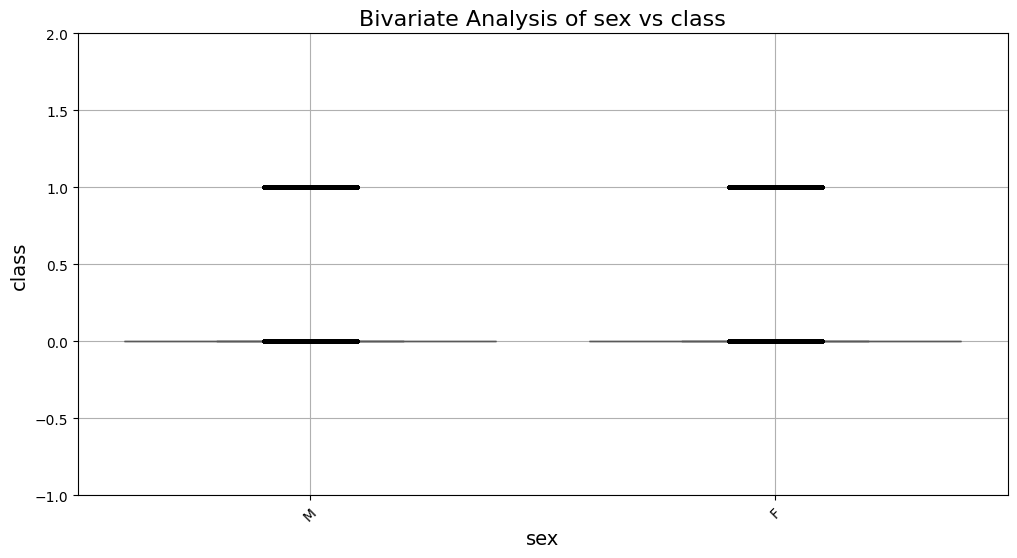

In [33]:
bivariate_analysis(fraud_df, 'sex', 'class')

- The distribution of classes (e.g., binary outcomes like 0 and 1) does not seem significantly different between male (M) and female (F). This suggests that gender may not have a strong influence on the class variable in this dataset.

4. Merge Datasets for Geolocation Analysis
- Convert IP addresses to integer format
- Merge Fraud_Data.csv with IpAddress_to_Country.csv


In [34]:
# Alternative approach: Filter using between()
merged_df = fraud_df.merge(ip_df, how='left', 
                           left_on='ip_address', 
                           right_on='lower_bound_ip_address')

# Assign country based on IP range
merged_df['country'] = merged_df.apply(
    lambda row: row['country'] if row['lower_bound_ip_address'] <= row['ip_address'] <= row['upper_bound_ip_address'] else None,
    axis=1
)

# Drop unnecessary IP range columns
merged_df.drop(columns=['lower_bound_ip_address', 'upper_bound_ip_address'], inplace=True)


In [35]:
merged_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,purchase_value_binned,age_binned,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,"(23.5, 38.0]","(35.4, 41.2]",None
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,"(8.855, 23.5]","(52.8, 58.6]",None
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,"(8.855, 23.5]","(52.8, 58.6]",None
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,"(38.0, 52.5]","(35.4, 41.2]",None
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,"(38.0, 52.5]","(41.2, 47.0]",None


5. Feature Engineering
- Transaction frequency and velocity for Fraud_Data.csv
- Time-Based features for Fraud_Data.csv


In [36]:
transaction_frequency(fraud_df)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,purchase_value_binned,age_binned,transaction_count
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,"(23.5, 38.0]","(35.4, 41.2]",1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,"(8.855, 23.5]","(52.8, 58.6]",1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,"(8.855, 23.5]","(52.8, 58.6]",1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,"(38.0, 52.5]","(35.4, 41.2]",1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,"(38.0, 52.5]","(41.2, 47.0]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3451154526,1,"(38.0, 52.5]","(23.8, 29.6]",1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2439047221,0,"(23.5, 38.0]","(29.6, 35.4]",1
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2748470523,0,"(38.0, 52.5]","(23.8, 29.6]",1
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3601174708,0,"(38.0, 52.5]","(35.4, 41.2]",1


In [37]:
add_time_features(fraud_df)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,purchase_value_binned,age_binned,transaction_count,hour_of_day,day_of_week,month,year
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,"(23.5, 38.0]","(35.4, 41.2]",1,2,5,4,2015
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,"(8.855, 23.5]","(52.8, 58.6]",1,1,0,6,2015
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,"(8.855, 23.5]","(52.8, 58.6]",1,18,3,1,2015
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,"(38.0, 52.5]","(35.4, 41.2]",1,13,0,5,2015
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,"(38.0, 52.5]","(41.2, 47.0]",1,18,2,9,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3451154526,1,"(38.0, 52.5]","(23.8, 29.6]",1,0,6,3,2015
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2439047221,0,"(23.5, 38.0]","(29.6, 35.4]",1,12,1,5,2015
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2748470523,0,"(38.0, 52.5]","(23.8, 29.6]",1,7,2,5,2015
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3601174708,0,"(38.0, 52.5]","(35.4, 41.2]",1,9,0,9,2015


6. Normalization and Scaling

In [38]:
fraud_df_scaled = scale_data(fraud_df)

In [39]:
fraud_df_scaled.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,purchase_value_binned,age_binned,transaction_count,hour_of_day,day_of_week,month,year
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,SEO,Chrome,M,0.679914,732758368,0,"(23.5, 38.0]","(35.4, 41.2]",1,2,5,4,2015
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,Ads,Chrome,F,2.304476,350311387,0,"(8.855, 23.5]","(52.8, 58.6]",1,1,0,6,2015
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,SEO,Opera,M,2.304476,2621473820,1,"(8.855, 23.5]","(52.8, 58.6]",1,18,3,1,2015
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,SEO,Safari,M,0.911994,3840542443,0,"(38.0, 52.5]","(35.4, 41.2]",1,13,0,5,2015
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,Ads,Safari,M,1.376155,415583117,0,"(38.0, 52.5]","(41.2, 47.0]",1,18,2,9,2015


In [40]:
credit_df_scaled = scale_data(credit_df)

In [41]:
credit_df_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,0.000000,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,0.000006,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,0.000006,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,0.000012,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


7. Encode Categorical Features

In [42]:
categorical_cols = ['device_id', 'source', 'browser', 'sex']
final_fraud_df = encode_categorical(fraud_df_scaled, categorical_cols)

In [43]:
final_fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,purchase_value_binned,age_binned,transaction_count,hour_of_day,day_of_week,month,year
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,89215,2,0,1,0.679914,732758368,0,"(23.5, 38.0]","(35.4, 41.2]",1,2,5,4,2015
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,24078,0,0,0,2.304476,350311387,0,"(8.855, 23.5]","(52.8, 58.6]",1,1,0,6,2015
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,131216,2,3,1,2.304476,2621473820,1,"(8.855, 23.5]","(52.8, 58.6]",1,18,3,1,2015
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,3977,2,4,1,0.911994,3840542443,0,"(38.0, 52.5]","(35.4, 41.2]",1,13,0,5,2015
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,68757,0,4,1,1.376155,415583117,0,"(38.0, 52.5]","(41.2, 47.0]",1,18,2,9,2015


In [44]:
final_ip_df = encode_categorical(ip_df, ['country'])

In [45]:
final_ip_df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,11
1,16777472.0,16777727,42
2,16777728.0,16778239,42
3,16778240.0,16779263,11
4,16779264.0,16781311,42


In [46]:
final_fraud_df.to_csv('../data/processed_fraud_data.csv', index=False)
final_ip_df.to_csv('../data/processed_ip_data.csv', index=False)
credit_df_scaled.to_csv('../data/processed_creditcard_data.csv', index=False)